In [1]:
import pandas as pd  
import numpy as np    
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn import preprocessing, svm  
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
 
data = pd.read_csv('xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

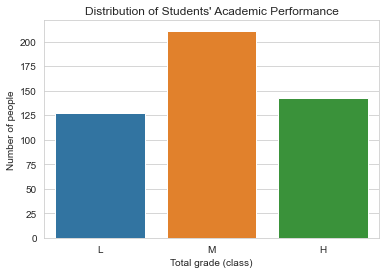

In [3]:
sns.set_style("whitegrid")
ax = sns.countplot(x='Class', data=data, order=['L', 'M', 'H'])
plt.xlabel('Total grade (class)')
plt.ylabel('Number of people')
plt.title("Distribution of Students' Academic Performance")
plt.show()

In [4]:
data.Class.unique()


array(['M', 'L', 'H'], dtype=object)

In [5]:
data.loc[data["Class"]=='L']  

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,9,6,15,85,No,Bad,Above-7,L
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,2,7,4,8,No,Bad,Above-7,L
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


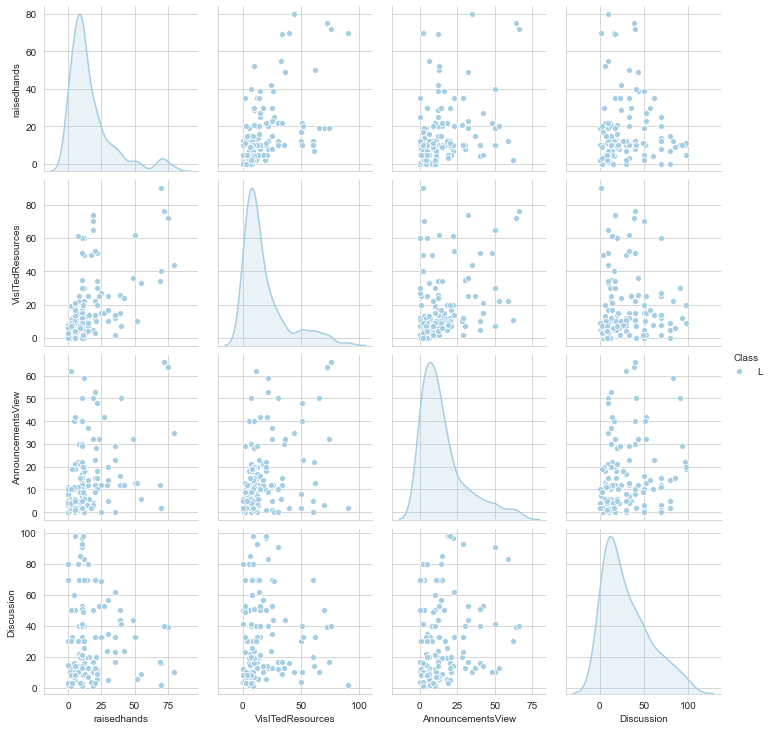

In [6]:
low_class=data.loc[data["Class"]=='L']
sns.pairplot(low_class, hue="Class",  
             diag_kind="kde", palette="Paired")  
plt.show()

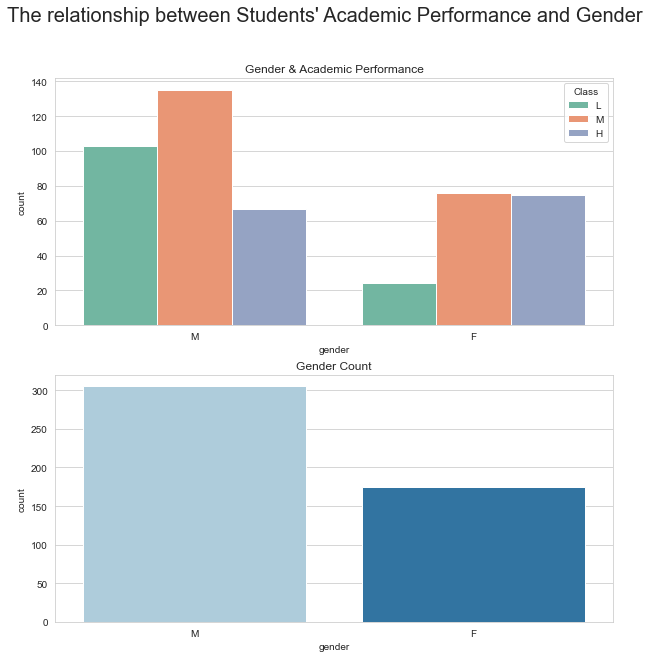

In [7]:
fig, axarr  = plt.subplots(2,figsize=(10,10))  
sns.countplot(x='gender', hue='Class', data=data, order=['M', 'F'],hue_order = ['L', 'M', 'H'], ax=axarr[0], palette="Set2")  
sns.countplot(x='gender', data=data, order=['M','F'], ax=axarr[1], palette="Paired")  
axarr[0].set_title('Gender & Academic Performance')  
axarr[1].set_title('Gender Count')  
fig.suptitle("The relationship between Students' Academic Performance and Gender", size=20)  
plt.show()  


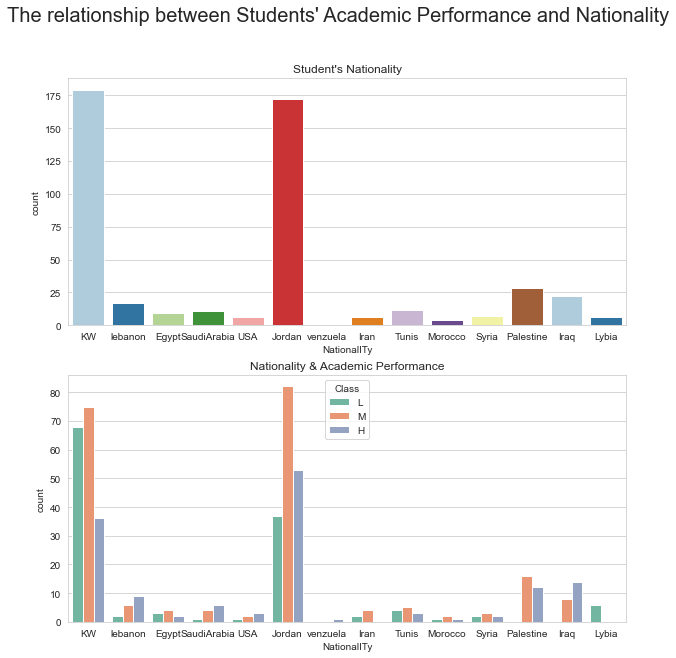

In [8]:
fig, axarr  = plt.subplots(2,figsize=(10,10))  
axarr[0].set_title("Student's Nationality")  
axarr[1].set_title('Nationality & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Nationality", size=20)  
sns.countplot(x='NationalITy', data=data, ax=axarr[0], palette="Paired")  
sns.countplot(x='NationalITy', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=axarr[1], palette="Set2")  
plt.show()  

In [9]:
data.loc[data['NationalITy'] == 'Iran']  

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M
126,F,Iran,Iran,lowerlevel,G-02,C,IT,F,Father,2,9,7,55,Yes,Good,Under-7,M
172,M,Iran,Iran,lowerlevel,G-02,B,French,S,Mum,20,22,53,13,No,Good,Above-7,L
175,M,Iran,Iran,lowerlevel,G-02,B,French,S,Father,10,2,13,53,No,Bad,Above-7,L
216,M,Iran,Iran,MiddleSchool,G-08,C,Spanish,S,Mum,27,41,32,61,Yes,Bad,Above-7,M
230,M,Iran,Iran,MiddleSchool,G-08,A,Spanish,S,Mum,51,42,12,29,No,Bad,Above-7,M


In [10]:
data.loc[data['NationalITy'] == 'Lybia']  

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
334,M,Lybia,Lybia,lowerlevel,G-02,A,French,F,Mum,10,8,9,3,No,Good,Above-7,L
335,M,Lybia,Lybia,lowerlevel,G-02,A,French,S,Mum,15,7,12,7,No,Good,Above-7,L
348,M,Lybia,Lybia,lowerlevel,G-02,B,French,F,Mum,20,3,9,3,No,Good,Above-7,L
349,M,Lybia,Lybia,lowerlevel,G-02,B,French,S,Mum,15,4,12,7,No,Good,Above-7,L
414,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,F,Mum,10,9,2,1,No,Good,Above-7,L
415,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,S,Mum,9,7,9,3,No,Good,Above-7,L


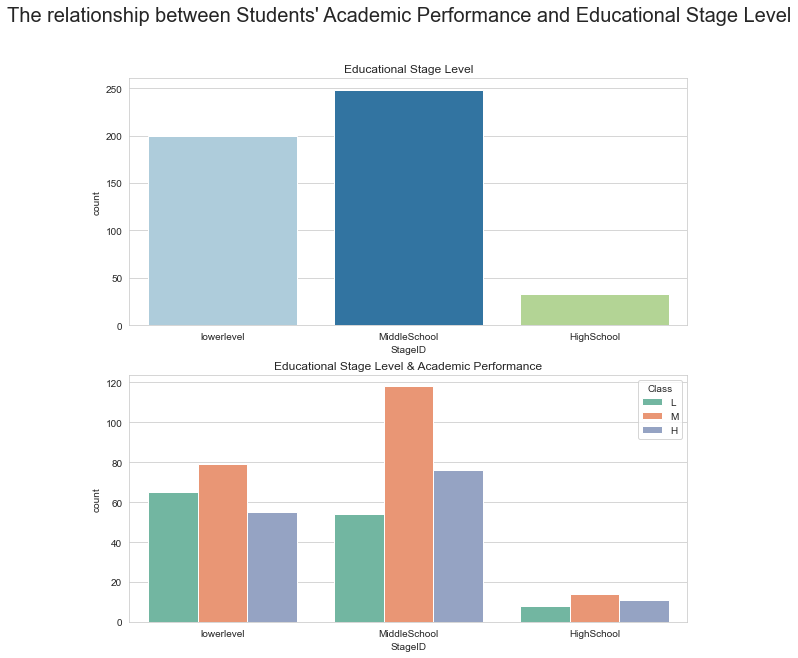

In [11]:
fig, axarr  = plt.subplots(2,figsize=(10,10))   
axarr[0].set_title('Educational Stage Level')  
axarr[1].set_title('Educational Stage Level & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Educational Stage Level", size=20)  
sns.countplot(x='StageID', data=data, ax=axarr[0], palette="Paired")    
sns.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], ax=axarr[1], palette="Set2")    
plt.show()  

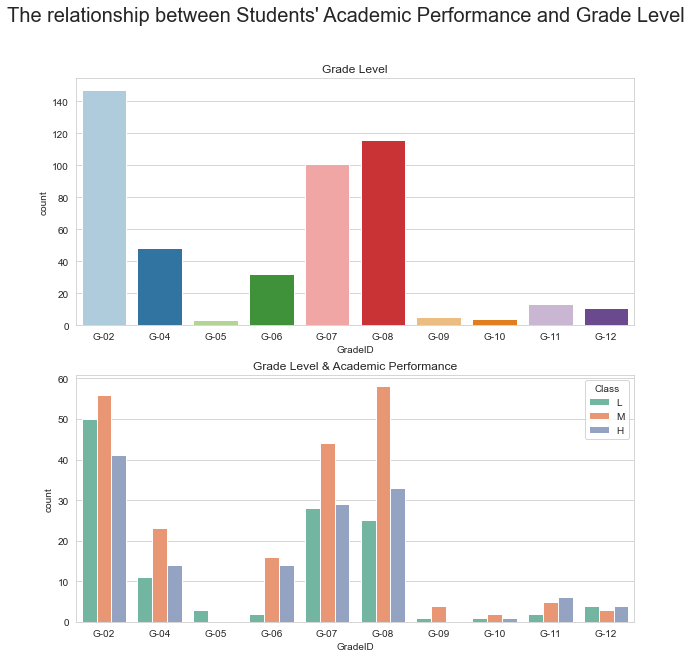

In [12]:
fig, axarr  = plt.subplots(2,figsize=(10,10))  
axarr[0].set_title('Grade Level')  
axarr[1].set_title('Grade Level & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Grade Level", size=20)  
sns.countplot(x='GradeID',  
              data=data,  
              order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'],  
              ax=axarr[0], palette="Paired")  
sns.countplot(x='GradeID',  
              hue='Class',  
              data=data,  
              order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'],  
              hue_order = ['L', 'M', 'H'],  
              ax=axarr[1], palette="Set2")  
plt.show()  

In [13]:
data.loc[data['GradeID']=='G-05']  

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,8,22,9,40,No,Bad,Above-7,L
46,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,7,10,1,30,No,Bad,Above-7,L
60,F,Jordan,Jordan,lowerlevel,G-05,A,English,F,Mum,21,10,28,20,No,Good,Above-7,L


In [14]:
data.loc[data['GradeID']=='G-09']

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,12,7,33,Yes,Good,Above-7,L
43,F,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,30,35,28,90,Yes,Good,Under-7,M
44,F,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,33,33,30,90,No,Bad,Under-7,M
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M
77,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,20,80,33,33,Yes,Good,Under-7,M


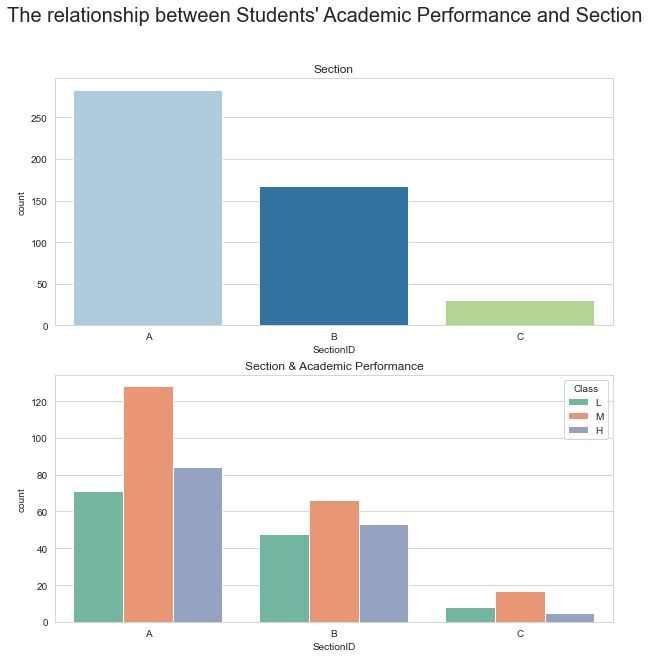

In [15]:
fig, axarr  = plt.subplots(2,figsize=(10,10))    
axarr[0].set_title('Section')  
axarr[1].set_title('Section & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Section", size=20)  
sns.countplot(x='SectionID', data=data,    
              order=['A', 'B', 'C'], ax = axarr[0], palette="Paired")    
sns.countplot(x='SectionID', hue='Class',    
              data=data, order=['A', 'B', 'C'],    
              hue_order = ['L', 'M', 'H'], ax = axarr[1], palette="Set2")    
plt.show()

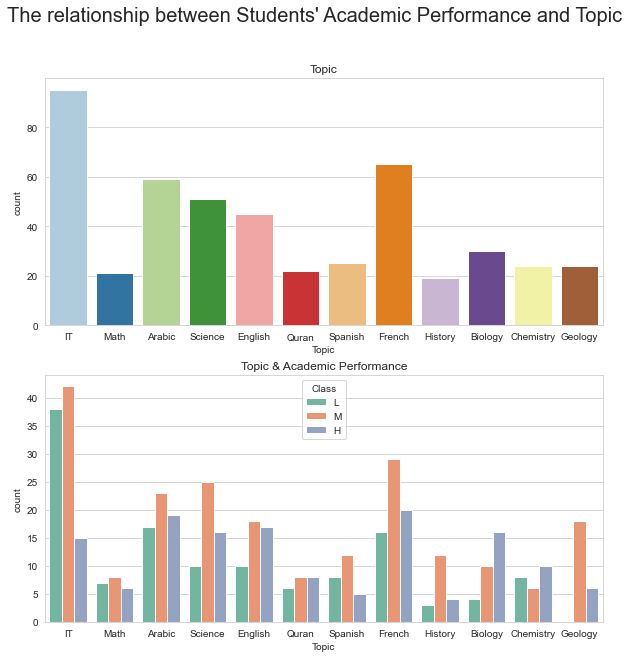

In [16]:
fig, axarr  = plt.subplots(2,figsize=(10,10))    
axarr[0].set_title('Topic')  
axarr[1].set_title('Topic & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Topic", size=20)  
sns.countplot(x='Topic', data=data, ax = axarr[0], palette="Paired")    
sns.countplot(x='Topic', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1], palette="Set2")    
plt.show()  

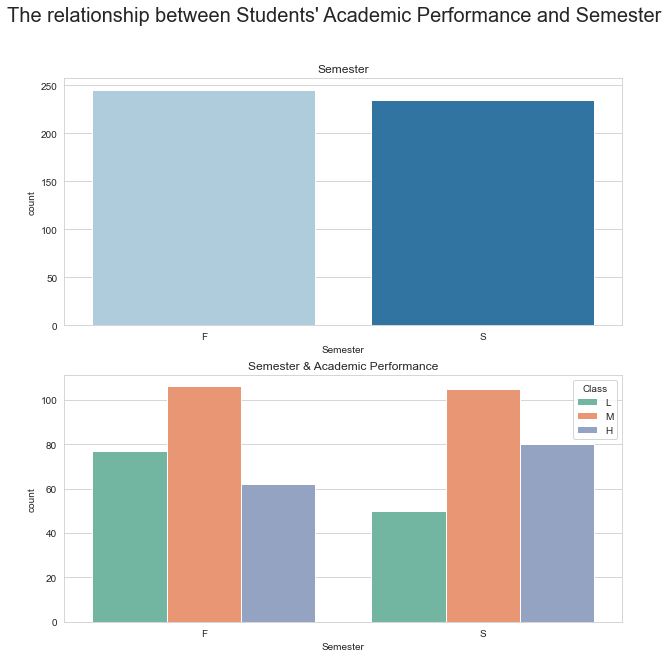

In [17]:
fig, axarr  = plt.subplots(2,figsize=(10,10))  
axarr[0].set_title('Semester')  
axarr[1].set_title('Semester & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Semester", size=20)  
sns.countplot(x='Semester', data=data, ax = axarr[0], palette="Paired")  
sns.countplot(x='Semester', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1], palette="Set2")  
plt.show()  

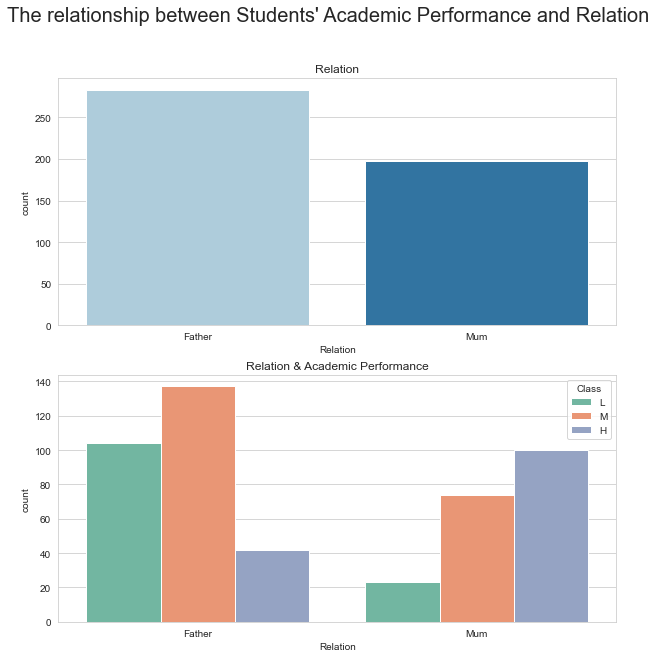

In [18]:
fig, axarr  = plt.subplots(2,figsize=(10,10))   
axarr[0].set_title('Relation')  
axarr[1].set_title('Relation & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and Relation", size=20)  
sns.countplot(x='Relation', data=data, ax = axarr[0], palette="Paired")    
sns.countplot(x='Relation', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1], palette="Set2")    
plt.show()   

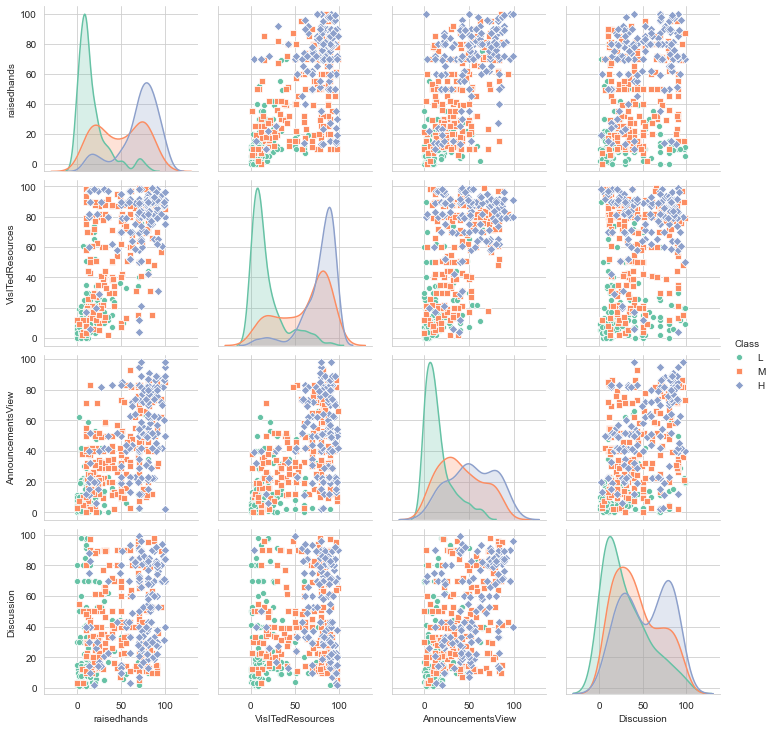

In [19]:
sns.pairplot(data, hue="Class",  
             diag_kind="kde",  
             hue_order = ['L', 'M', 'H'],  
             markers=["o", "s", "D"], palette="Set2")  
plt.show()  

In [20]:
data.groupby('GradeID').median()  

,raisedhands,VisITedResources,AnnouncementsView,Discussion
GradeID,,,,
G-02,27.0,60.0,21.0,30.0
G-04,45.5,50.0,33.0,43.5
G-05,8.0,10.0,9.0,30.0
G-06,72.0,61.0,49.0,36.5
G-07,50.0,71.0,33.0,50.0
G-08,70.5,77.0,45.5,40.5
G-09,20.0,35.0,30.0,44.0
G-10,33.5,41.5,24.0,26.0
G-11,70.0,63.0,50.0,49.0


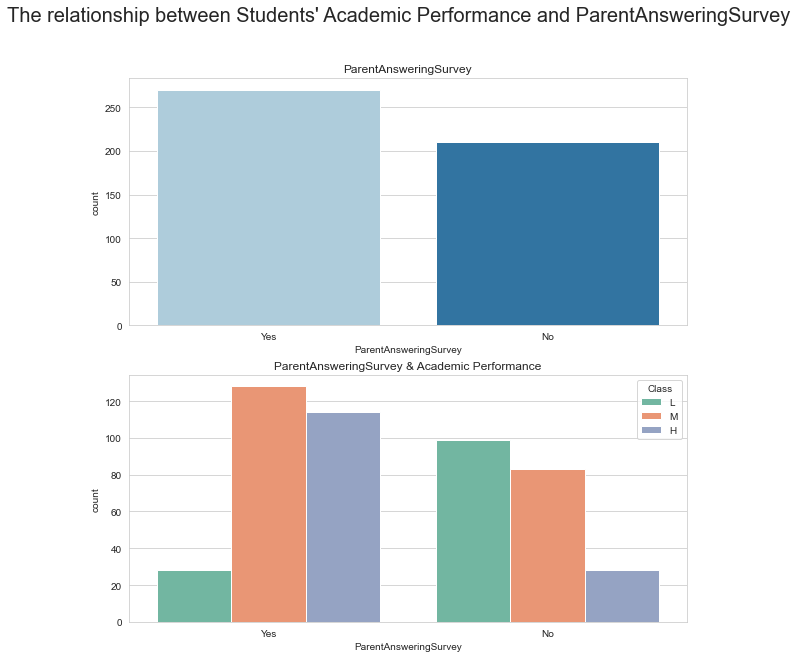

In [21]:
fig, axarr  = plt.subplots(2,figsize=(10,10))    
axarr[0].set_title('ParentAnsweringSurvey')  
axarr[1].set_title('ParentAnsweringSurvey & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and ParentAnsweringSurvey", size=20)  
sns.countplot(x='ParentAnsweringSurvey', data=data,    
              order=['Yes', 'No'], ax = axarr[0], palette="Paired")    
sns.countplot(x='ParentAnsweringSurvey', hue='Class',    
              data=data, order=['Yes', 'No'], hue_order = ['L', 'M', 'H'],    
              ax = axarr[1], palette="Set2")    
plt.show()     

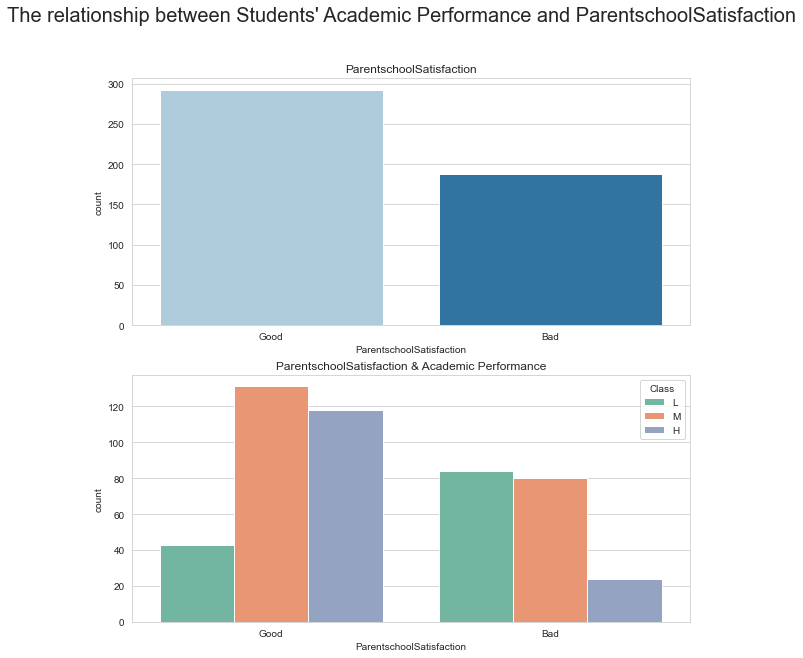

In [22]:
fig, axarr  = plt.subplots(2,figsize=(10,10))    
axarr[0].set_title('ParentschoolSatisfaction')  
axarr[1].set_title('ParentschoolSatisfaction & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and ParentschoolSatisfaction", size=20)  
sns.countplot(x='ParentschoolSatisfaction', data=data,    
              order=['Good', 'Bad'], ax = axarr[0], palette="Paired")    
sns.countplot(x='ParentschoolSatisfaction', hue='Class',    
              data=data, order=['Good', 'Bad'],    
              hue_order = ['L', 'M', 'H'], ax = axarr[1], palette="Set2")    
plt.show()   

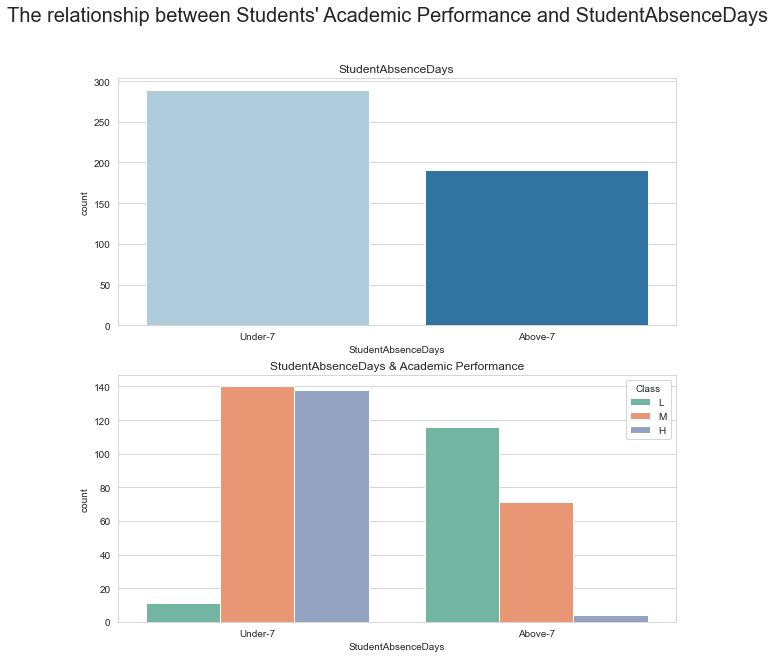

In [23]:
fig, axarr  = plt.subplots(2,figsize=(10,10))   
axarr[0].set_title('StudentAbsenceDays')  
axarr[1].set_title('StudentAbsenceDays & Academic Performance')  
fig.suptitle("The relationship between Students' Academic Performance and StudentAbsenceDays", size=20)  
sns.countplot(x='StudentAbsenceDays', data=data,    
              order=['Under-7', 'Above-7'],    
              ax = axarr[0], palette="Paired")    
sns.countplot(x='StudentAbsenceDays', hue='Class',    
              data=data, order=['Under-7', 'Above-7'],    
              hue_order = ['L', 'M', 'H'],    
              ax = axarr[1], palette="Set2")    
plt.show()  

In [24]:
# Convert grades into data  
gradeID_dict = {"G-01" : 1,  
                "G-02" : 2,  
                "G-03" : 3,  
                "G-04" : 4,  
                "G-05" : 5,  
                "G-06" : 6,  
                "G-07" : 7,  
                "G-08" : 8,  
                "G-09" : 9,  
                "G-10" : 10,  
                "G-11" : 11,  
                "G-12" : 12}  
   
data = data.replace({"GradeID" : gradeID_dict})  
# Convert scores into data  
class_dict = {"L" : -1,  
                "M" : 0,  
                "H" : 1}  
data = data.replace({"Class" : class_dict})  
   
# Convert to Scale data  
data["GradeID"] = preprocessing.scale(data["GradeID"])  
data["raisedhands"] = preprocessing.scale(data["raisedhands"])  
data["VisITedResources"] = preprocessing.scale(data["VisITedResources"])  
data["AnnouncementsView"] = preprocessing.scale(data["AnnouncementsView"])  
data["Discussion"] = preprocessing.scale(data["Discussion"])  
   
# Use virtual code conversion to convert 11 columns into 64 columns  
data = pd.get_dummies(data, columns=["gender",  
                                     "NationalITy",  
                                     "PlaceofBirth",  
                                     "SectionID",  
                                     "StageID",  
                                     "Topic",  
                                     "Semester",  
                                     "Relation",  
                                     "ParentAnsweringSurvey",  
                                     "ParentschoolSatisfaction",  
                                     "StudentAbsenceDays"])  
   
   
data.head()  

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-0.563838,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,-0.563838,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,-0.563838,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,-0.563838,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,-0.563838,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


In [25]:
corr = data.corr()  
corr.iloc[[5]]  

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
Class,0.071654,0.646298,0.677094,0.52737,0.308183,1.0,0.26349,-0.26349,-0.02631,-0.054841,...,-0.126239,0.126239,-0.401142,0.401142,-0.435495,0.435495,-0.375901,0.375901,-0.671312,0.671312


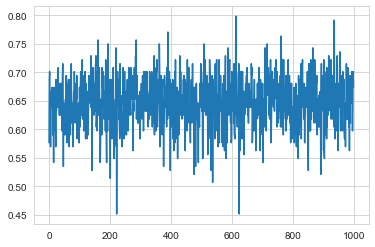

In [26]:
perc = Perceptron(eta0=0.1, random_state=15)
 
# The ratio of data_train to data_test is 7:3
results=[]
 
# Make multiple predictions
for _ in range(1000):
    # Randomly generate a data set of 0.7
    data_train = data.sample(frac=0.7)
    # Dataset lable
    data_train_X = data_train.loc[:, lambda x: [l for l in data if l != "Class"]] 
    data_train_Y = data_train.loc[:, lambda x: "Class"]
 
    # The rest is the test dataset
    data_test = data.loc[~data.index.isin(data_train.index)]
    # Test dataset lable
    data_test_X = data_test.loc[:, lambda x: [l for l in data if l != "Class"]]
    data_test_Y = data_test.loc[:, lambda x: "Class"]
 
    # Use the .fit() for training
    perc.fit(data_train_X, data_train_Y)
    # Accuracy of prediction results
    results.append(perc.score(data_test_X, data_test_Y))

plt.plot([*range(0,1000)],results)

In [27]:
Final = np.hstack(results)
print('Minimum Accuracy Score:   %.8f' % Final[Final.argmin()])
print('Maximum Accuracy Score:   %.8f' % Final[Final.argmax()])
print('Average Accuracy Score:   %.8f' % np.average(Final))


Minimum Accuracy Score:   0.45138889
Maximum Accuracy Score:   0.79861111
Average Accuracy Score:   0.64765278


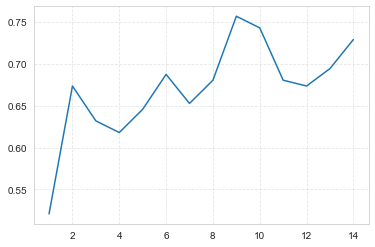

In [28]:
# The ratio of data_train to data_test is 7:3
 
results2 = []
 
for i in range(1,15):
    # Training dataset
    data_train = data.sample(frac=0.7)
    # label
    data_train_X = data_train.loc[:, lambda x: [l for l in data if l != "Class"]]
    data_train_Y = data_train.loc[:, lambda x: "Class"]
 
    # Test dataset
    data_test = data.loc[~data.index.isin(data_train.index)]
    # label
    data_test_X = data_test.loc[:, lambda x: [l for l in data if l != "Class"]]
    data_test_Y = data_test.loc[:, lambda x: "Class"]
     
    # Build decision trees of different depths
    tree = DecisionTreeClassifier(random_state=56, criterion='gini', max_depth=i)
    # Use the .fit() for training
    tree.fit(data_train_X, data_train_Y)
    # result
    results2.append(tree.score(data_test_X, data_test_Y))

plt.plot([*range(1,15)],results2)
plt.grid(True, linestyle='--', alpha=0.5)

In [29]:
print(max(results2),results2.index(max(results2)))

0.7569444444444444 8
